In [13]:
import torch
import torch.nn as nn
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
from equalizer import *
import librosa
import torchaudio.transforms as T

In [14]:
class XpassFilter(nn.Module):
    def __init__(self, cutoff_frequency, sample_rate=16000, filter_type='low', order=5):
        super(XpassFilter, self).__init__()
        self.cutoff_frequency = cutoff_frequency
        self.sample_rate = sample_rate
        self.filter_type = filter_type
        self.order = order

    def forward(self, audio):
        # audio is a PyTorch tensor with shape (num_channels, num_samples)
        audio_np = audio.detach().cpu().numpy()  # Convert to numpy array
        filtered_audio = []

        for channel in audio_np:
            filtered_channel = butterworth_filter(channel, self.sample_rate, self.cutoff_frequency, self.filter_type, self.order)
            filtered_audio.append(filtered_channel)

        filtered_audio_np = np.stack(filtered_audio)
        return torch.from_numpy(filtered_audio_np).to(audio.device)

In [44]:
def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None, vmin=None, vmax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    im = ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest", vmin=vmin, vmax=vmax)
    plt.colorbar(im, ax=ax)  # Add a colorbar for reference

In [45]:
# Define transform
spectrogram = T.Spectrogram(n_fft=512)

Original waveform shape: torch.Size([1, 172720])
Filtered waveform shape: torch.Size([1, 172720])


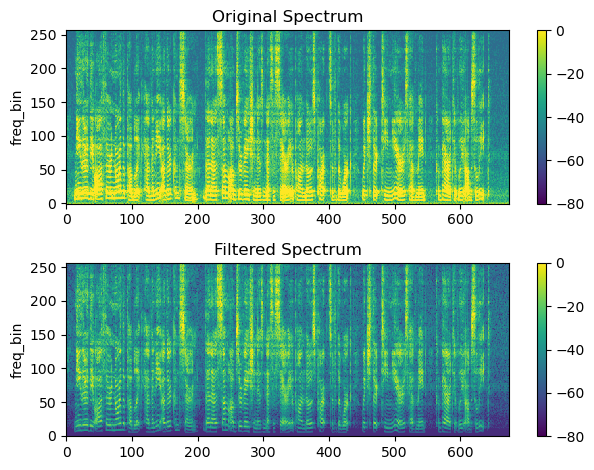

In [49]:
# Test the XpassFilter class
if __name__ == "__main__":
    import torchaudio

    # Load a sample wave file
    waveform, sample_rate = torchaudio.load("19-198-0002.flac")
    print("Original waveform shape:", waveform.shape)

    # Create an instance of the XpassFilter class
    cutoff_frequency = 4000  # Set cutoff frequency
    filter_type = 'high'      # Filter type ('low' or 'high')
    order = 2 # Filter order

    filter = XpassFilter(cutoff_frequency=cutoff_frequency, sample_rate=sample_rate, filter_type=filter_type, order=order)

    # Apply the filter
    filtered_waveform = filter(waveform)
    print("Filtered waveform shape:", filtered_waveform.shape)

    # Visualize the original and filtered spectrum
    fig, axs = plt.subplots(2, 1)
    plot_spectrogram(spectrogram(waveform)[0], title="Original Spectrum", ax=axs[0], vmin=-80, vmax=0)
    plot_spectrogram(spectrogram(filtered_waveform)[0], title="Filtered Spectrum", ax=axs[1], vmin=-80, vmax=0)
    fig.tight_layout()

Original waveform shape: torch.Size([1, 172720])
Filtered waveform shape: torch.Size([1, 172720])


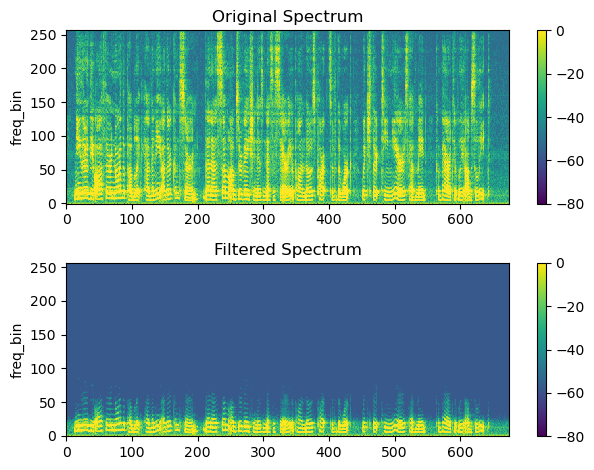

In [50]:
# Test the XpassFilter class
if __name__ == "__main__":
    import torchaudio

    # Load a sample wave file
    waveform, sample_rate = torchaudio.load("19-198-0002.flac")
    print("Original waveform shape:", waveform.shape)

    # Create an instance of the XpassFilter class
    cutoff_frequency = 500  # Set cutoff frequency
    filter_type = 'low'      # Filter type ('low' or 'high')
    order = 2 # Filter order

    filter = XpassFilter(cutoff_frequency=cutoff_frequency, sample_rate=sample_rate, filter_type=filter_type, order=order)

    # Apply the filter
    filtered_waveform = filter(waveform)
    print("Filtered waveform shape:", filtered_waveform.shape)

    # Visualize the original and filtered spectrum
    fig, axs = plt.subplots(2, 1)
    plot_spectrogram(spectrogram(waveform)[0], title="Original Spectrum", ax=axs[0], vmin=-80, vmax=0)
    plot_spectrogram(spectrogram(filtered_waveform)[0], title="Filtered Spectrum", ax=axs[1], vmin=-80, vmax=0)
    fig.tight_layout()